# **Projet Time Series Master 2 IMSD 2019/2020**

- Abdou Lahat DIOP
- Amady DIOP

- Encadreur : Jean-Michel ETIENNE

### **Les Modules utilisés**

In [0]:
# Load in the r magic
import warnings
warnings.filterwarnings('ignore')
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [0]:
%%R
install.packages('ggplot2')
install.packages('zoo')
install.packages('dygraphs')
install.packages('plotly')
install.packages('tseries')
install.packages('lubridate')
install.packages('tidyverse')
install.packages("urca")
install.packages('caschrono')
install.packages('moments')
install.packages('forecast')
install.packages('readxl')
install.packages('lmtest')
install.packages('dse')
install.packages('vars')
library(dse)
library(vars)
library(lmtest)
library(readxl)
library(forecast)
library(moments) 
library(caschrono)
library(urca)
library(ggplot2)
library(zoo)
library(dygraphs)
library(plotly)
library(tseries)
library(lubridate)
library(tidyverse)

### **Chargement des fichiers de données**

Pour charger les fichiers : il faut exécuter le code ci-dessous, selectionner les fichiers enrégistrés dans votre ordinateur et attendre que le chargement de chacun des fichier soit à 100%. Pour ensuite commencer à éxécuter les codes qui suivent. 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving coint.csv to coint.csv
Saving valeurs.csv to valeurs.csv


# **Exercice 1 (Modèle NATREX)**

##### **Importation du fichier coint.csv**

In [0]:
%%R
coint <- read.table("coint.csv",header=TRUE, sep=',')
head(coint)

  YEAR QTR INTDIFF     lrexr   lusprod  lusdisrat    ldisrat        ltot t
1 1973  Q1   -4.12 -2.729751 -7.637016 -0.2030911 -0.2494994  0.06925844 1
2 1973  Q2   -5.03 -2.714500 -7.662765 -0.2083541 -0.2705876  0.02898754 2
3 1973  Q3   -4.42 -2.677293 -7.684658 -0.2111504 -0.2939538  0.01615544 3
4 1973  Q4   -2.39 -2.755821 -7.680526 -0.2225078 -0.2901915 -0.02184174 4
5 1974  Q1   -3.95 -2.754249 -7.693607 -0.2076609 -0.3018166 -0.17264981 5
6 1974  Q2   -4.19 -2.769823 -7.708230 -0.1978514 -0.2966107 -0.20409536 6


## **Question 1 : Graphique et statistiques de chacune des séries**

#### **Les graphiqes pour chacune des variables**

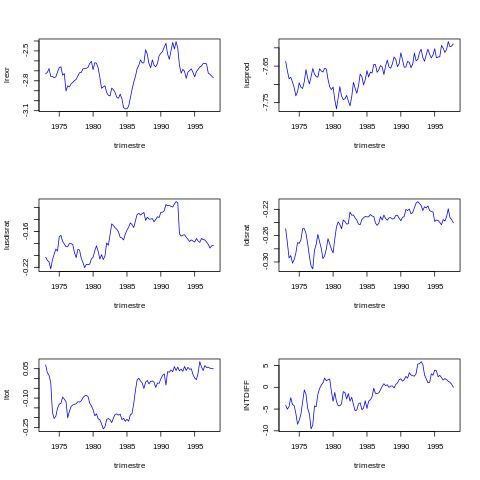

In [0]:
%%R
# Transformation des données en séries chronologiques
lrexr <- ts(coint$lrexr, start=1973, end=c(1997,4), frequency=4)
lusprod <- ts(coint$lusprod, start=1973, end=c(1997,4), frequency = 4)
lusdisrat <- ts(coint$lusdisrat, start=1973, end=c(1997,4), frequency = 4)
ldisrat <- ts(coint$ldisrat, start=1973, end=c(1997,4), frequency = 4)
ltot <- ts(coint$ltot, start=1973, end=c(1997,4), frequency = 4)
INTDIFF <- ts(coint$INTDIFF, start=1973, end=c(1997,4), frequency = 4)

# Tracer les graphiques
par(mfrow=c(3,2))
plot(lrexr, xlab="trimestre", col='blue')
plot(lusprod, xlab="trimestre", col='blue')
plot(lusdisrat, xlab="trimestre", col='blue')
plot(ldisrat, xlab="trimestre", col='blue')
plot(ltot, xlab="trimestre", col='blue')
plot(INTDIFF, xlab="trimestre", col='blue')

In [0]:
%%R
lrexr

          Qtr1      Qtr2      Qtr3      Qtr4
1973 -2.729751 -2.714500 -2.677293 -2.755821
1974 -2.754249 -2.769823 -2.760691 -2.711355
1975 -2.667373 -2.659680 -2.743329 -2.727721
1976 -2.902212 -2.849950 -2.860803 -2.831031
1977 -2.816069 -2.798479 -2.784921 -2.750693
1978 -2.718846 -2.716905 -2.679209 -2.678633
1979 -2.675195 -2.664978 -2.625657 -2.604285
1980 -2.688304 -2.618268 -2.623542 -2.672267
1981 -2.766365 -2.874899 -2.861894 -2.849782
1982 -2.915733 -2.945044 -2.951618 -2.872618
1983 -2.890898 -2.917462 -2.965908 -2.975360
1984 -2.933755 -2.978760 -3.069110 -3.080701
1985 -3.081462 -3.053870 -2.972413 -2.887039
1986 -2.813937 -2.756696 -2.677824 -2.645259
1987 -2.589407 -2.620204 -2.619835 -2.487960
1988 -2.532469 -2.628438 -2.668380 -2.590004
1989 -2.642975 -2.659592 -2.626157 -2.546274
1990 -2.525500 -2.506143 -2.462397 -2.423776
1991 -2.530891 -2.583799 -2.500235 -2.414932
1992 -2.480918 -2.407055 -2.472067 -2.644116
1993 -2.723723 -2.685247 -2.704443 -2.775324
1994 -2.71

#### **Graphiques autocorrélation et autocorrélation partielle pour chaque série**

NULL
NULL
NULL
NULL
NULL
NULL


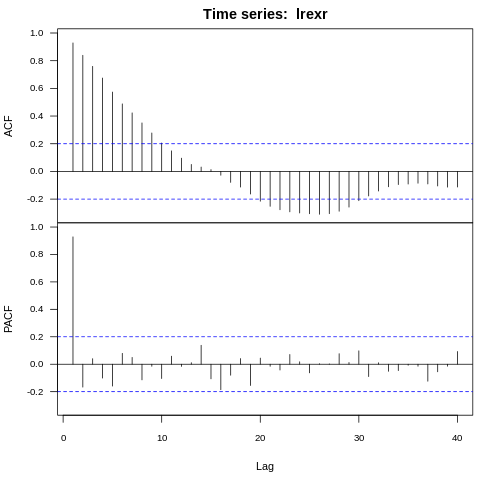

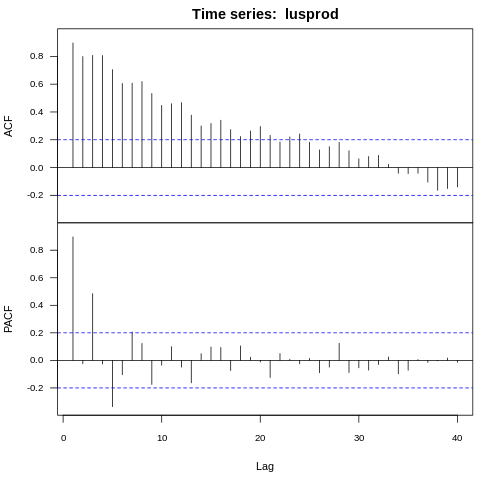

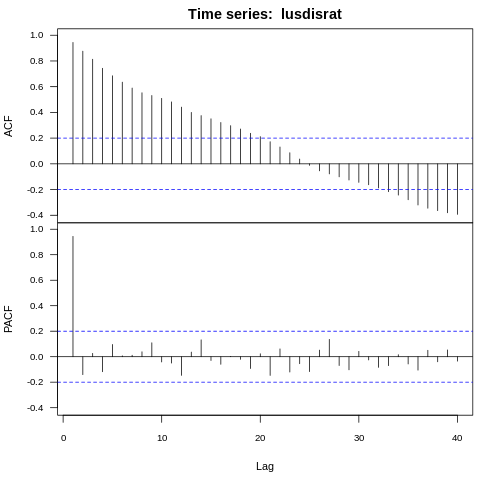

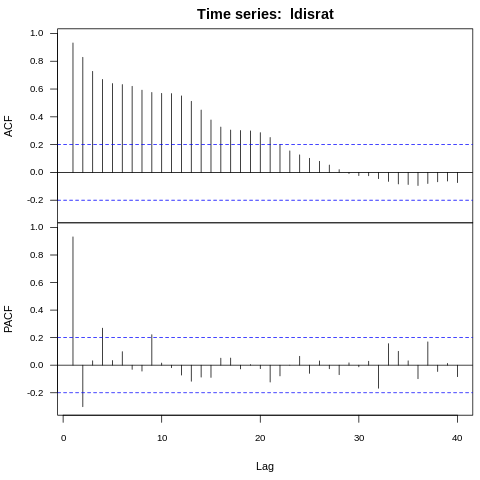

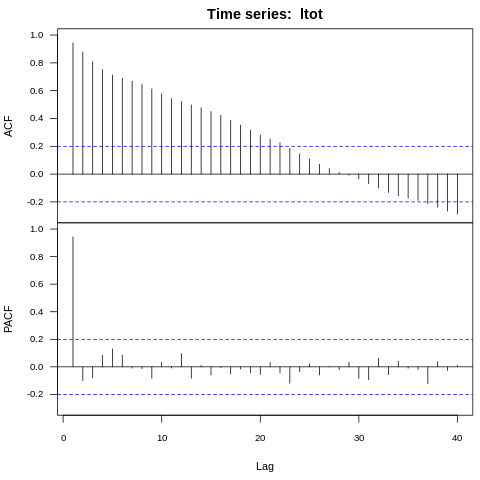

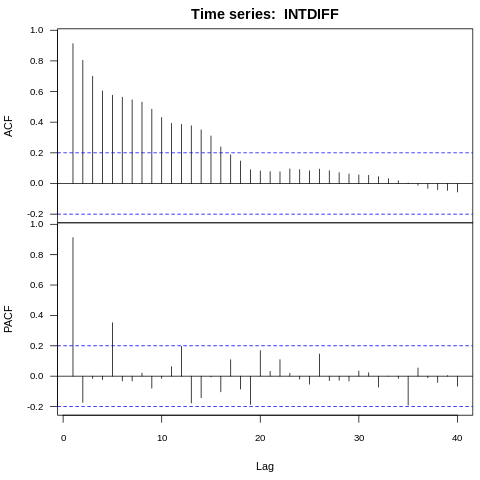

In [0]:
%%R
print(acf2y(lrexr, lag.max=40, numer=FALSE))
print(acf2y(lusprod, lag.max=40, numer=FALSE))
print(acf2y(lusdisrat, lag.max=40, numer=FALSE))
print(acf2y(ldisrat, lag.max=40, numer=FALSE))
print(acf2y(ltot, lag.max=40, numer=FALSE))
print(acf2y(INTDIFF, lag.max=40, numer=FALSE))

###### **Statistiques des séries**

In [0]:
%%R
stats <- function(x){
    
    cat("variance :", var(x))
    cat("\nécart-type :", sd(x))
    cat('\nsummary :\n')
    print(summary(x))
    cat("\nskewness :", skewness(x))
    cat("\nkurtosis :", kurtosis(x))
    print(jarque.bera.test((x)))
}

In [0]:
%%R
stats(lrexr)

variance : 0.02238514
écart-type : 0.1496167
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.081  -2.802  -2.710  -2.722  -2.628  -2.407 

skewness : -0.3166919
kurtosis : 2.951115
	Jarque Bera Test

data:  (x)
X-squared = 1.6815, df = 2, p-value = 0.4314



In [0]:
%%R
stats(lusprod)

variance : 0.001847075
écart-type : 0.04297761
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.767  -7.695  -7.659  -7.664  -7.633  -7.583 

skewness : -0.2871044
kurtosis : 2.351676
	Jarque Bera Test

data:  (x)
X-squared = 3.1252, df = 2, p-value = 0.2096



In [0]:
%%R
stats(lusdisrat)

variance : 0.0008550506
écart-type : 0.02924125
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2225 -0.1897 -0.1735 -0.1686 -0.1435 -0.1104 

skewness : 0.2259202
kurtosis : 2.122555
	Jarque Bera Test

data:  (x)
X-squared = 4.0586, df = 2, p-value = 0.1314



In [0]:
%%R
stats(ldisrat)

variance : 0.0005978011
écart-type : 0.02444997
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3104 -0.2598 -0.2365 -0.2452 -0.2299 -0.2083 

skewness : -0.9446502
kurtosis : 2.924778
	Jarque Bera Test

data:  (x)
X-squared = 14.896, df = 2, p-value = 0.0005825



In [0]:
%%R
stats(ltot)

variance : 0.01050901
écart-type : 0.1025135
summary :
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.25711 -0.17951 -0.05594 -0.07216  0.02976  0.08594 

skewness : -0.1313549
kurtosis : 1.520979
	Jarque Bera Test

data:  (x)
X-squared = 9.4022, df = 2, p-value = 0.009085



In [0]:
%%R
stats(INTDIFF)

variance : 11.31534
écart-type : 3.363828
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-9.5400 -3.6150 -0.2600 -0.8581  1.7825  5.8900 

skewness : -0.3196573
kurtosis : 2.49591
	Jarque Bera Test

data:  (x)
X-squared = 2.7618, df = 2, p-value = 0.2514



### **Question 2 : Stationnarité des séries**

#### **Test de Dikey Fuller Augmenté pour chacune des séries**

#### **Modèle 3 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "trend", lags = 4)
} 
print("Modèle 3 pour la série LREXR")
print(summary(test(lrexr)))
print("Modèle 3 pour la série LUSPROD")
print(summary(test(lusprod)))
print("Modèle 3 pour la série LUSDISRAT")
print(summary(test(lusdisrat)))
print("Modèle 3 pour la série LDISRAT")
print(summary(test(ldisrat)))
print("Modèle 3 pour la série LTOT")
print(summary(test(ltot)))
print("Modèle 3 pour la série INTDIFF")
print(summary(test(INTDIFF)))

[1] "Modèle 3 pour la série LREXR"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.181076 -0.033798  0.003129  0.036472  0.131103 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.3252874  0.1261877  -2.578   0.0116 *
z.lag.1     -0.1159915  0.0444576  -2.609   0.0107 *
tt           0.0001789  0.0002264   0.790   0.4317  
z.diff.lag1  0.2029686  0.1039247   1.953   0.0540 .
z.diff.lag2 -0.0160863  0.1047223  -0.154   0.8783  
z.diff.lag3  0.0902507  0.1034378   0.873   0.3853  
z.diff.lag4  0.1847634  0.1047951   1.763   0.0814 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05565 on 88 degrees of freedom
Multiple R-squared:  0.1132,	Adjusted R-squared:  0.0

#### **Modèle 2 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "drift", lags = 4)
} 
print("Modèle 2 pour la série LREXR")
print(summary(test(lrexr)))
print("Modèle 2 pour la série LUSPROD")
print(summary(test(lusprod)))
print("Modèle 2 pour la série LUSDISRAT")
print(summary(test(lusdisrat)))
print("Modèle 2 pour la série LDISRAT")
print(summary(test(ldisrat)))
print("Modèle 2 pour la série LTOT")
print(summary(test(ltot)))
print("Modèle 2 pour la série INTDIFF")
print(summary(test(INTDIFF)))

[1] "Modèle 2 pour la série LREXR"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.188261 -0.032210  0.002373  0.035889  0.131315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.27859    0.11125  -2.504   0.0141 *
z.lag.1     -0.10225    0.04083  -2.504   0.0141 *
z.diff.lag1  0.19489    0.10320   1.888   0.0622 .
z.diff.lag2 -0.02242    0.10419  -0.215   0.8302  
z.diff.lag3  0.08359    0.10288   0.813   0.4187  
z.diff.lag4  0.17946    0.10436   1.720   0.0890 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05553 on 89 degrees of freedom
Multiple R-squared:  0.1069,	Adjusted R-squared:  0.05678 
F-statistic: 2.132 on 5 and 89 DF,  p-value: 0.06887


Value of te

#### **Modèle 1 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "none", lags = 4)
} 
print("Modèle 1 pour la série LREXR")
print(summary(test(lrexr)))
print("Modèle 1 pour la série LUSPROD")
print(summary(test(lusprod)))
print("Modèle 1 pour la série LUSDISRAT")
print(summary(test(lusdisrat)))
print("Modèle 1 pour la série LDISRAT")
print(summary(test(ldisrat)))
print("Modèle 1 pour la série LTOT")
print(summary(test(ltot)))
print("Modèle 1 pour la série INTDIFF")
print(summary(test(INTDIFF)))

[1] "Modèle 1 pour la série LREXR"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.189503 -0.034082  0.007695  0.034136  0.122933 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
z.lag.1     -0.0001468  0.0021517  -0.068    0.946
z.diff.lag1  0.1505121  0.1046033   1.439    0.154
z.diff.lag2 -0.0793451  0.1046196  -0.758    0.450
z.diff.lag3  0.0377436  0.1041557   0.362    0.718
z.diff.lag4  0.1213027  0.1046787   1.159    0.250

Residual standard error: 0.05714 on 90 degrees of freedom
Multiple R-squared:  0.04403,	Adjusted R-squared:  -0.009078 
F-statistic: 0.8291 on 5 and 90 DF,  p-value: 0.5323


Value of test-statistic is: -0.0682 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61

[1] "M

### **Question 3: Analyse univariée de la série LREXR et estimation d'un ARIMA**

###### **Différentiation de la série LREXR et graphiques des autocorrélation et autocorrélations partielles**

In [0]:
%%R
lrexr <- ts(coint$lrexr, start=1973, end=c(1997,4), frequency=4)
diff_lrexr <- diff(lrexr)

###### **Graphique de la série lrexr différenciée**

      LAG         ACF1         PACF
 [1,]   1  0.128998190  0.128998190
 [2,]   2 -0.066236151 -0.084279133
 [3,]   3  0.033219496  0.054646853
 [4,]   4  0.132667392  0.117858117
 [5,]   5 -0.109784967 -0.143879970
 [6,]   6 -0.144504531 -0.096406999
 [7,]   7  0.050134455  0.063849852
 [8,]   8  0.001571838 -0.042650243
 [9,]   9 -0.005066574  0.048266464
[10,]  10 -0.117774514 -0.118621369
[11,]  11 -0.032407002 -0.044117192
[12,]  12 -0.051874271 -0.053725284
[13,]  13 -0.179637204 -0.176165354
[14,]  14 -0.006138097  0.073229633
[15,]  15  0.159835817  0.140943559
[16,]  16  0.064864963  0.004049501
[17,]  17 -0.114779608 -0.081692301
[18,]  18  0.121078118  0.095617775
[19,]  19  0.002851897 -0.120946431
[20,]  20 -0.089698403 -0.025700891


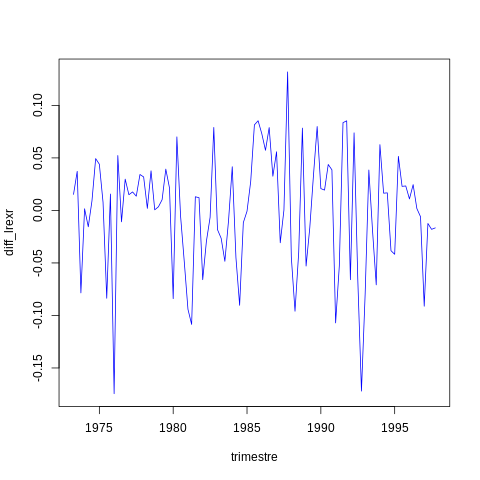

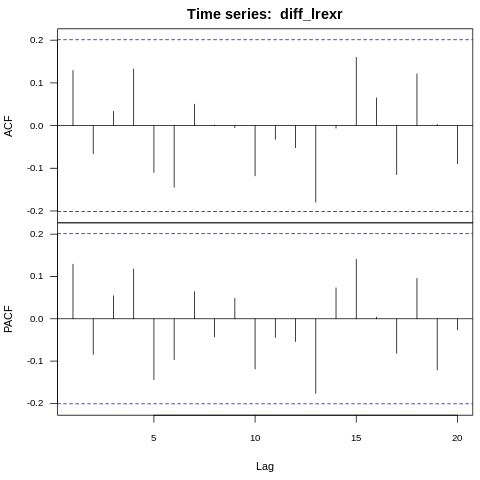

In [0]:
%%R
plot(diff_lrexr, xlab="trimestre", col='blue')
acf2y(diff_lrexr, lag.max=20)

Les graphiques ne nous permettent pas de sélectionner nos ARIMA. 

##### **l'ordre p et q et AIC de plusieurs ARIMA estimés**

In [0]:
%%R
for(i in 0:6){
  for(j in 0:6){
    modell <- Arima(diff_lrexr, order=c(i,1,j), include.mean=FALSE, method="CSS-ML")
    aic <- AIC(modell)
    print(aic)
    print(i);print(j)
  }
}

[1] -228.0825
[1] 0
[1] 0
[1] -275.7902
[1] 0
[1] 1
[1] -276.0056
[1] 0
[1] 2
[1] -274.2435
[1] 0
[1] 3
[1] -272.2479
[1] 0
[1] 4
[1] -273.1497
[1] 0
[1] 5
[1] -271.8388
[1] 0
[1] 6
[1] -242.0104
[1] 1
[1] 0
[1] -275.7044
[1] 1
[1] 1
[1] -274.179
[1] 1
[1] 2
[1] -272.0063
[1] 1
[1] 3
[1] -270.9263
[1] 1
[1] 4
[1] -271.3856
[1] 1
[1] 5
[1] -269.5544
[1] 1
[1] 6
[1] -254.6935
[1] 2
[1] 0
[1] -274.2388
[1] 2
[1] 1
[1] -272.3223
[1] 2
[1] 2
[1] -277.2478
[1] 2
[1] 3
[1] -275.2488
[1] 2
[1] 4
[1] -274.2026
[1] 2
[1] 5
[1] -272.5137
[1] 2
[1] 6
[1] -263.6489
[1] 3
[1] 0
[1] -272.6533
[1] 3
[1] 1
[1] -270.286
[1] 3
[1] 2
[1] -272.3772
[1] 3
[1] 3
[1] -274.1503
[1] 3
[1] 4
[1] -269.2307
[1] 3
[1] 5
[1] -270.5138
[1] 3
[1] 6
[1] -261.7301
[1] 4
[1] 0
[1] -272.3148
[1] 4
[1] 1
[1] -270.9747
[1] 4
[1] 2
[1] -270.8464
[1] 4
[1] 3
[1] -272.4065
[1] 4
[1] 4
[1] -272.3364
[1] 4
[1] 5
[1] -271.4191
[1] 4
[1] 6
[1] -260.5511
[1] 5
[1] 0
[1] -272.1592
[1] 5
[1] 1
[1] -270.5007
[1] 5
[1] 2
[1] -268.9708


#### **Le modèle ARIMA**

Series: diff_lrexr 
ARIMA(2,1,3) 

Coefficients:
          ar1      ar2     ma1      ma2      ma3
      -1.0481  -0.7944  0.2723  -0.2723  -1.0000
s.e.   0.0776   0.0724  0.0551   0.0530   0.0653

sigma^2 estimated as 0.002955:  log likelihood=144.62
AIC=-277.25   AICc=-276.32   BIC=-261.74

Training set error measures:
                        ME       RMSE        MAE      MPE     MAPE      MASE
Training set -1.227464e-05 0.05269002 0.04081201 107.7418 215.2837 0.7229144
                     ACF1
Training set -0.008370528
             ar1      ar2      ma1       ma2       ma3
t.stat -13.51046 -10.9782 4.944705 -5.139062 -15.31049
p.val    0.00000   0.0000 0.000001  0.000000   0.00000

	Jarque Bera Test

data:  (res_diff_lrexr)
X-squared = 7.0443, df = 2, p-value = 0.02954

      Retard   p-value
 [1,]      1 0.9336244
 [2,]      2 0.9896897
 [3,]      3 0.9301428
 [4,]      4 0.9685348
 [5,]      5 0.9854204
 [6,]      6 0.8847896
 [7,]      7 0.9379064
 [8,]      8 0.9595899
 [9,]    

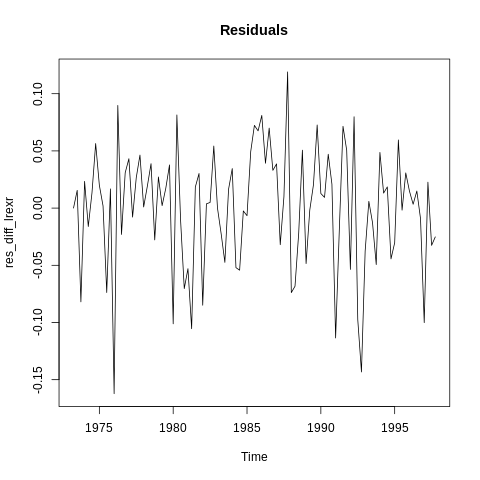

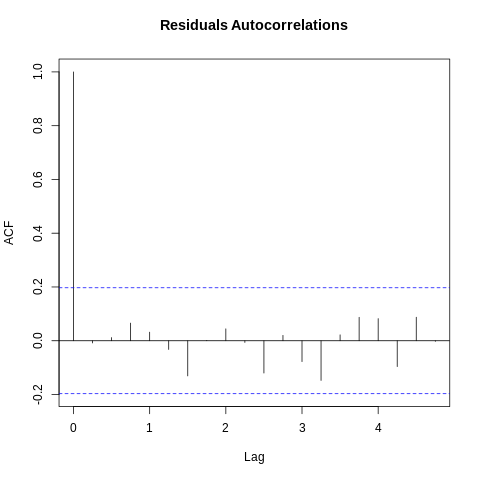

In [0]:
%%R
# Modèle ARIMA(2,1,3)
lrexr_arma <- Arima(diff_lrexr, order=c(2,1,3), include.mean=FALSE, method="CSS-ML")
summary(lrexr_arma)
print(t_stat(lrexr_arma))
res_diff_lrexr <- residuals(lrexr_arma)
plot(res_diff_lrexr, main= 'Residuals')
acf(res_diff_lrexr, main= 'Residuals Autocorrelations')
print(jarque.bera.test((res_diff_lrexr)))
print(Box.test.2(res_diff_lrexr,nlag=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),type="Ljung-Box"))

### **Question 4 : Prévision à partir du ARIMA(2,1,3) sur la période 1998 - 2000 comprises**

        Point Forecast       Lo 95      Hi 95
1998 Q1   -0.034104536 -0.14214064 0.07393157
1998 Q2    0.022020068 -0.08866713 0.13270726
1998 Q3    0.001916963 -0.10875948 0.11259341
1998 Q4   -0.021597020 -0.13303673 0.08984269
1999 Q1    0.019018750 -0.09404846 0.13208596
1999 Q2   -0.004873092 -0.11808438 0.10833820
1999 Q3   -0.012095845 -0.12542559 0.10123390
1999 Q4    0.014454119 -0.09971589 0.12862412
2000 Q1   -0.007636359 -0.12199832 0.10672560
2000 Q2   -0.005573440 -0.11993447 0.10878759
2000 Q3    0.009812818 -0.10491590 0.12454154
2000 Q4   -0.007952954 -0.12282714 0.10692123
$pred
             Qtr1         Qtr2         Qtr3         Qtr4
1998 -0.034104536  0.022020068  0.001916963 -0.021597020
1999  0.019018750 -0.004873092 -0.012095845  0.014454119
2000 -0.007636359 -0.005573440  0.009812818 -0.007952954

$se
           Qtr1       Qtr2       Qtr3       Qtr4
1998 0.05512147 0.05647410 0.05646861 0.05685804
1999 0.05768841 0.05776192 0.05782236 0.05825107
2000 0.05834901 

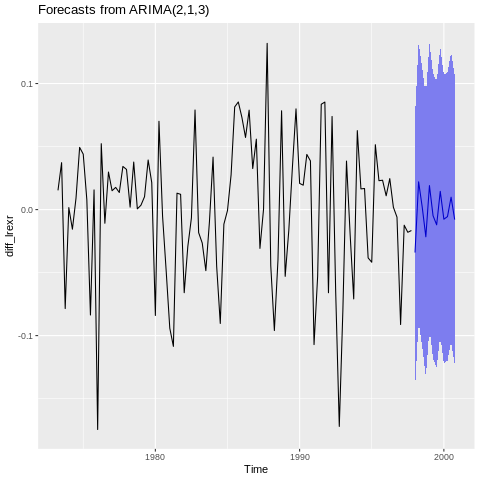

In [0]:
%%R
futurVal <- forecast(lrexr_arma, h=12, level=95)
print(futurVal)
print(predict(lrexr_arma, start=1998, n.ahead=12, se.fit=TRUE))
autoplot(futurVal)

### **Question 5 : Test de cointégration des séries LREXR, LUSPROD, LUSDISRAT,LDISRAT, LTOT, INTDIFF.**

In [0]:
%%R
# Transformation des données en séries chronologiques
lrexr <- ts(coint$lrexr, start=1973, end=c(1997,4), frequency = 4)
lusprod <- ts(coint$lusprod, start=1973, end=c(1997,4), frequency = 4)
lusdisrat <- ts(coint$lusdisrat, start=1973, end=c(1997,4), frequency = 4)
ldisrat <- ts(coint$ldisrat, start=1973, end=c(1997,4), frequency = 4)
ltot <- ts(coint$ltot, start=1973, end=c(1997,4), frequency = 4)
INTDIFF <- ts(coint$INTDIFF, start=1973, end=c(1997,4), frequency = 4)

###### **Diférencier toutes les séries**

In [0]:
%%R
diff_lrexr = diff(lrexr, differences=1)
diff_lusprod = diff(lusprod, differences=1)
diff_lusdisrat = diff(lusdisrat, differences=1)
diff_ldisrat = diff(ldisrat, differences=1)
diff_ltot = diff(ltot, differences=1)
diff_intdiff = diff(INTDIFF, differences=1)

#### **Etape 1 : Tests de racine unitaire sur toutes les séries pour vérifier qu’elles sont I(1) : test de Dikey Fuller**

#### **Modèle 3 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "trend", lags = 4)
} 
print("Modèle 3 pour la série diff_lrexr")
print(summary(test(diff_lrexr)))
print("Modèle 3 pour la série diff_lusprod")
print(summary(test(diff_lusprod)))
print("Modèle 3 pour la série diff_lusdisrat")
print(summary(test(diff_lusdisrat)))
print("Modèle 3 pour la série diff_ldisrat")
print(summary(test(diff_ldisrat)))
print("Modèle 3 pour la série diff_ltot")
print(summary(test(diff_ltot)))
print("Modèle 3 pour la série diff_intdiff")
print(summary(test(diff_intdiff)))

[1] "Modèle 3 pour la série diff_lrexr"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.185761 -0.032092  0.007239  0.033298  0.135076 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.291e-03  1.270e-02   0.259    0.796    
z.lag.1     -8.898e-01  2.108e-01  -4.220 5.97e-05 ***
tt          -6.239e-05  2.183e-04  -0.286    0.776    
z.diff.lag1  5.920e-02  1.958e-01   0.302    0.763    
z.diff.lag2 -2.293e-02  1.708e-01  -0.134    0.894    
z.diff.lag3  6.270e-03  1.395e-01   0.045    0.964    
z.diff.lag4  1.488e-01  1.060e-01   1.405    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05737 on 87 degrees of freedom
Multiple R-squared:  0.4576,	Adj

#### **Modèle 2 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "drift", lags = 4)
}
print("Modèle 2 pour la série diff_lrexr")
print(summary(test(diff_lrexr))) 
print("Modèle 2 pour la série diff_lusprod")
print(summary(test(diff_lusprod)))
print("Modèle 2 pour la série diff_lusdisrat")
print(summary(test(diff_lusdisrat)))
print("Modèle 2 pour la série diff_ldisrat")
print(summary(test(diff_ldisrat)))
print("Modèle 2 pour la série diff_ltot")
print(summary(test(diff_ltot)))
print("Modèle 2 pour la série diff_intdiff")
print(summary(test(diff_intdiff)))

[1] "Modèle 2 pour la série diff_lrexr"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.183133 -0.034049  0.006853  0.032702  0.134798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.917e-05  5.888e-03   0.013    0.989    
z.lag.1     -8.908e-01  2.097e-01  -4.248 5.35e-05 ***
z.diff.lag1  6.085e-02  1.947e-01   0.313    0.755    
z.diff.lag2 -2.089e-02  1.698e-01  -0.123    0.902    
z.diff.lag3  7.927e-03  1.387e-01   0.057    0.955    
z.diff.lag4  1.497e-01  1.054e-01   1.421    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05707 on 88 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4262 
F-statistic: 14.82 on 5 and 88 DF, 

#### **Modèle 1 pour chaque série**

In [0]:
%%R
test <-function(i){
    ur.df(i, type = "none", lags = 4)
} 
print("Modèle 1 pour la série diff_lrexr")
print(summary(test(diff_lrexr)))
print("Modèle 1 pour la série diff_lusprod")
print(summary(test(diff_lusprod)))
print("Modèle 1 pour la série diff_lusdisrat")
print(summary(test(diff_lusdisrat)))
print("Modèle 1 pour la série diff_ldisrat")
print(summary(test(diff_ldisrat)))
print("Modèle 1 pour la série diff_ltot")
print(summary(test(diff_ltot)))
print("Modèle 1 pour la série diff_intdiff")
print(summary(test(diff_intdiff)))

[1] "Modèle 1 pour la série diff_lrexr"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.183055 -0.033968  0.006932  0.032780  0.134875 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.890768   0.208520  -4.272 4.84e-05 ***
z.diff.lag1  0.060807   0.193586   0.314    0.754    
z.diff.lag2 -0.020924   0.168807  -0.124    0.902    
z.diff.lag3  0.007882   0.137877   0.057    0.955    
z.diff.lag4  0.149701   0.104746   1.429    0.156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05675 on 89 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4265 
F-statistic: 14.98 on 5 and 89 DF,  p-value: 1.177e-10


Value of test-statistic is: -4.2719 

Cr

#### **Etape 2 : Estimer par les MCO, la relation de long terme**

In [0]:
%%R
reg <- lm(lrexr ~ lusprod + lusdisrat + ldisrat + ltot + INTDIFF)
print(summary(reg))
dwtest(reg)


Call:
lm(formula = lrexr ~ lusprod + lusdisrat + ldisrat + ltot + INTDIFF)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.161108 -0.055933 -0.000621  0.049134  0.228394 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.256369   2.686385  -7.168 1.70e-10 ***
lusprod      -2.114809   0.352461  -6.000 3.66e-08 ***
lusdisrat     2.424133   0.369746   6.556 2.95e-09 ***
ldisrat      -3.461006   0.501801  -6.897 6.08e-10 ***
ltot          1.314856   0.159956   8.220 1.10e-12 ***
INTDIFF       0.022134   0.003752   5.899 5.72e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07816 on 94 degrees of freedom
Multiple R-squared:  0.7409,	Adjusted R-squared:  0.7271 
F-statistic: 53.75 on 5 and 94 DF,  p-value: < 2.2e-16


	Durbin-Watson test

data:  reg
DW = 0.84885, p-value = 1.821e-10
alternative hypothesis: true autocorrelation is greater than 0



#### **Etape 3 : Effectuer un test de racine unitaire sur les résidus estimés ε(t) et vérifier que I(0)**

In [0]:
%%R
resid_reg <- reg$residuals
test <- ur.df(resid_reg, type = "drift")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134613 -0.048527  0.000245  0.033960  0.167964 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0001407  0.0063707   0.022    0.982    
z.lag.1     -0.4755918  0.0937907  -5.071 1.95e-06 ***
z.diff.lag   0.1209698  0.1017812   1.189    0.238    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06307 on 95 degrees of freedom
Multiple R-squared:  0.2238,	Adjusted R-squared:  0.2074 
F-statistic: 13.69 on 2 and 95 DF,  p-value: 5.95e-06


Value of test-statistic is: -5.0708 12.8564 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



##### **Rang de cointégration : Test de Johansen**

In [0]:
%%R
cointest <- ca.jo(data.frame(lrexr,lusprod,lusdisrat,ldisrat,ltot,INTDIFF), type="trace", K=4, ecdet="none", spec="longrun")
summary(cointest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.43942207 0.32275374 0.25986500 0.12710091 0.06426477 0.03987450

Values of teststatistic and critical values of test:

           test 10pct  5pct   1pct
r <= 5 |   3.91  6.50  8.18  11.65
r <= 4 |  10.28 15.66 17.95  23.52
r <= 3 |  23.33 28.71 31.52  37.22
r <= 2 |  52.22 45.23 48.28  55.43
r <= 1 |  89.63 66.49 70.60  78.87
r = 0  | 145.20 85.18 90.39 104.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               lrexr.l4  lusprod.l4 lusdisrat.l4  ldisrat.l4      ltot.l4
lrexr.l4      1.0000000  1.00000000   1.00000000   1.0000000  1.000000000
lusprod.l4    0.7977977  4.24807005  -5.39596864  20.7076928 -5.571896072
lusdisrat.l4 -5.8629797 -2.13682643  -5.99215906  11.6769335 13.449669635
ldisrat.l4   14.4378293  3.40244678   3.53192705 -29.1856116 -2.023972932
ltot.l4       0.5077120 -2.4356

### **Question 6 : Estimez avec votre logiciel cette/ces relation(s) de cointégration. Comparer avec (1)**

In [0]:
%%R
vecm <- cajorls(cointest)
vecm

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
               lrexr.d     lusprod.d   lusdisrat.d  ldisrat.d   ltot.d    
ect1           -6.252e-02   2.709e-02   9.335e-03   -8.268e-03  -8.480e-03
constant       -7.097e-01   3.086e-01   1.065e-01   -9.328e-02  -9.628e-02
lrexr.dl1      -2.737e-02   8.080e-02   2.715e-02   -2.008e-02   2.361e-01
lusprod.dl1     2.052e-01  -2.122e-01  -1.460e-01    1.713e-02   2.766e-01
lusdisrat.dl1   1.716e+00  -4.052e-01  -4.600e-04    1.686e-01   7.382e-03
ldisrat.dl1    -4.565e-01   3.786e-02   8.680e-02    1.010e-01   1.368e-01
ltot.dl1        4.199e-01   5.305e-02   3.665e-02   -1.186e-02   1.026e-01
INTDIFF.dl1     4.841e-03  -9.465e-04  -1.594e-03    1.282e-03  -1.096e-03
lrexr.dl2      -2.931e-01  -5.296e-04  -1.646e-02    1.102e-02  -5.923e-02
lusprod.dl2     3.887e-02  -6.561e-01  -4.230e-02    9.477e-02   3.094e-01
lusdisrat.dl2   8.113e-01  -6.178e-02  -1.681e-01    1.742e-01   4.776e-01
ldisrat.dl2    -1.322e+0

In [0]:
%%R
print(vecm$rlm$coefficients[1:6])
print(vecm$beta[1:6])

[1] -0.06252401 -0.70968659 -0.02737413  0.20516039  1.71589083 -0.45646119
[1]  1.0000000  0.7977977 -5.8629797 14.4378293  0.5077120 -0.1246604


In [0]:
%%R
summary(vecm$rlm)

Response lrexr.d :

Call:
lm(formula = lrexr.d ~ ect1 + constant + lrexr.dl1 + lusprod.dl1 + 
    lusdisrat.dl1 + ldisrat.dl1 + ltot.dl1 + INTDIFF.dl1 + lrexr.dl2 + 
    lusprod.dl2 + lusdisrat.dl2 + ldisrat.dl2 + ltot.dl2 + INTDIFF.dl2 + 
    lrexr.dl3 + lusprod.dl3 + lusdisrat.dl3 + ldisrat.dl3 + ltot.dl3 + 
    INTDIFF.dl3 - 1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.171621 -0.030681  0.002458  0.034741  0.137009 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
ect1          -0.062524   0.036524  -1.712   0.0910 .
constant      -0.709687   0.414273  -1.713   0.0908 .
lrexr.dl1     -0.027374   0.122107  -0.224   0.8232  
lusprod.dl1    0.205160   0.529074   0.388   0.6993  
lusdisrat.dl1  1.715891   0.735578   2.333   0.0223 *
ldisrat.dl1   -0.456461   0.794191  -0.575   0.5672  
ltot.dl1       0.419936   0.237707   1.767   0.0813 .
INTDIFF.dl1    0.004841   0.005231   0.925   0.3577  
lrexr.dl2     -0.293090   0.131315 

# **Exercice 2 : Etude sur le taux de chômage dans la région Nord-Pas-de-Calais**

###### **Importation du fichier valeurs.csv**

In [0]:
%%R
valeur <- read.table("valeurs.csv",header=TRUE, sep=',')
head(valeur)

  Ann_e Trimestre NpdC IdF Tot t
1  1982         1  9.0 5.6 6.7 1
2  1982         2  9.0 5.6 6.8 2
3  1982         3  9.1 5.6 7.0 3
4  1982         4  8.9 5.5 7.0 4
5  1983         1  9.0 5.6 7.0 5
6  1983         2  9.3 5.7 7.0 6


## **Partie A : Etude de la série univariée NPdC (taux de chômage dans le Nord-Pas-de-Calais)**

### **Question 1 : graphique de la série NPdC quelques statistiques**

      LAG        ACF1         PACF
 [1,]   1  0.95305110  0.953051103
 [2,]   2  0.88071898 -0.300865389
 [3,]   3  0.80008367 -0.060962477
 [4,]   4  0.71406344 -0.080469475
 [5,]   5  0.63059027  0.005675845
 [6,]   6  0.55254706 -0.004182154
 [7,]   7  0.47903148 -0.025482480
 [8,]   8  0.41244792  0.006155592
 [9,]   9  0.35718617  0.048631296
[10,]  10  0.31453910  0.048579434
[11,]  11  0.27781985 -0.034367761
[12,]  12  0.23628006 -0.124722394
[13,]  13  0.18543228 -0.120150350
[14,]  14  0.12976395 -0.040089485
[15,]  15  0.07815230  0.045374310
[16,]  16  0.02916388 -0.027348049
[17,]  17 -0.01838203 -0.041613011
[18,]  18 -0.05392327  0.093843239
[19,]  19 -0.07749098  0.049087329
[20,]  20 -0.08836359  0.050733460
[21,]  21 -0.09264698 -0.060477907
[22,]  22 -0.09409523 -0.050420017
[23,]  23 -0.09663353 -0.040370426
[24,]  24 -0.09830275  0.035635019
[25,]  25 -0.10227388 -0.025651977
[26,]  26 -0.11216044 -0.069383373
[27,]  27 -0.12647004 -0.027732143
[28,]  28 -0.1486971

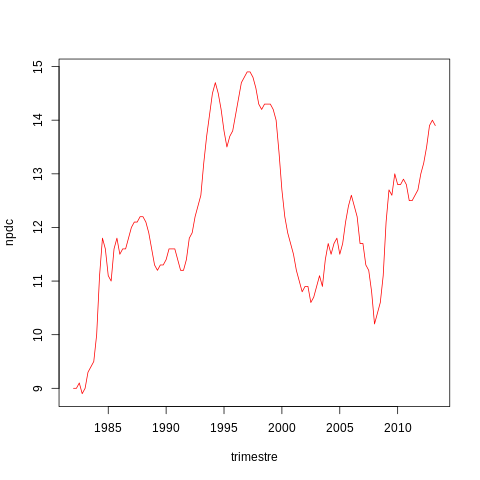

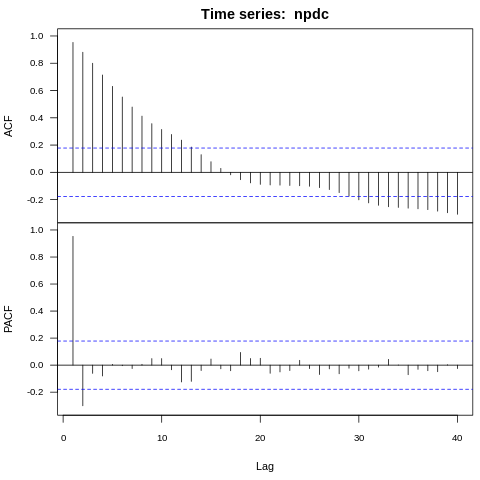

In [0]:
%%R
# Transformation des données en série chronologique
npdc <- ts(valeur$NpdC, start=1982, end=c(2013,2), frequency=4)
idf <- ts(valeur$IdF, start=1982, end=c(2013,2), frequency=4)
tot <- ts(valeur$Tot, start=1982, end=c(2013,2), frequency=4)
# Tracer le graphique
plot(npdc, xlab="trimestre", col='red')
print(acf2y(npdc, lag.max=40))

##### **Statistiques de la série**

In [0]:
%%R
stats(npdc)

variance : 2.100399
écart-type : 1.449275
summary :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.90   11.30   11.90   12.16   13.15   14.90 

skewness : 0.02010325
kurtosis : 2.615489
	Jarque Bera Test

data:  (x)
X-squared = 0.78469, df = 2, p-value = 0.6755



### **Question 2 : Teste d'intégration de la série NPdC ou non, puis estimation du modèle ARIMA**

##### **Test de Dikey Fuller Augmenté pour chacune des séries**

###### **Détermination du nombre de reatrds: critère de l'AIC**

###### **Modèle 3 : NpdC**

In [0]:
%%R
test <- ur.df(npdc, type="trend", lags=12, selectlags = "AIC")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45521 -0.13263  0.01124  0.13863  0.65234 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5528964  0.2291661   2.413   0.0175 *  
z.lag.1     -0.0431627  0.0181323  -2.380   0.0190 *  
tt          -0.0000769  0.0006845  -0.112   0.9108    
z.diff.lag   0.5643445  0.0780341   7.232 6.96e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.237 on 109 degrees of freedom
Multiple R-squared:  0.3322,	Adjusted R-squared:  0.3139 
F-statistic: 18.08 on 3 and 109 DF,  p-value: 1.361e-09


Value of test-statistic is: -2.3804 2.0183 2.8489 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3

###### **Modèle 2 : NpdC**

In [0]:
%%R
test <- ur.df(npdc, type="drift", lags=12, selectlags = "AIC")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4559 -0.1336  0.0100  0.1389  0.6494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54828    0.22444   2.443   0.0162 *  
z.lag.1     -0.04322    0.01804  -2.395   0.0183 *  
z.diff.lag   0.56399    0.07762   7.266 5.67e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.236 on 110 degrees of freedom
Multiple R-squared:  0.3322,	Adjusted R-squared:   0.32 
F-statistic: 27.36 on 2 and 110 DF,  p-value: 2.275e-10


Value of test-statistic is: -2.3951 3.0484 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



###### **Modèle 1 : NpdC**

In [0]:
%%R
test <- ur.df(npdc, type="none", lags=12, selectlags = "AIC")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5013 -0.1311 -0.0092  0.1447  0.7235 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    0.0006436  0.0018290   0.352    0.726    
z.diff.lag 0.5387320  0.0786306   6.851 4.28e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2412 on 111 degrees of freedom
Multiple R-squared:  0.3012,	Adjusted R-squared:  0.2886 
F-statistic: 23.92 on 2 and 111 DF,  p-value: 2.296e-09


Value of test-statistic is: 0.3519 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



##### **L'ordre d'intégration de la série**

In [0]:
%%R
ndiffs(npdc)

[1] 1


###### **Estimation du modèle ARMA**

##### **Différenciation de la série NpdC et graphiques de la série différenciée** 

      LAG          ACF1        PACF
 [1,]   1  5.491802e-01  0.54918025
 [2,]   2  2.163365e-01 -0.12208230
 [3,]   3  1.130284e-01  0.06796807
 [4,]   4 -6.864771e-05 -0.10588628
 [5,]   5 -2.467491e-02  0.03692658
 [6,]   6 -4.264123e-02 -0.05206822
 [7,]   7 -1.276215e-01 -0.11275594
 [8,]   8 -1.161025e-01  0.01811517
 [9,]   9  7.967436e-03  0.11242508
[10,]  10  6.583533e-03 -0.06746924
[11,]  11  3.422410e-02  0.06602667
[12,]  12  8.334151e-02  0.03406629
[13,]  13  7.501045e-02  0.02004391
[14,]  14  3.522516e-02 -0.05085998
[15,]  15  5.110791e-02  0.05448602
[16,]  16 -1.371651e-01 -0.26638165
[17,]  17 -1.602143e-01  0.09402937
[18,]  18 -1.228896e-01 -0.10069643
[19,]  19 -1.581575e-01 -0.01985037
[20,]  20 -6.266520e-02  0.07707769


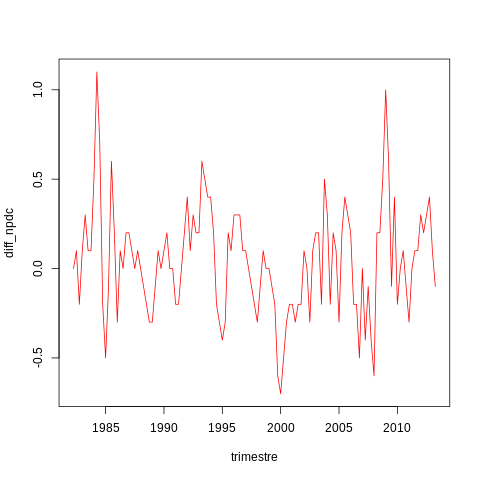

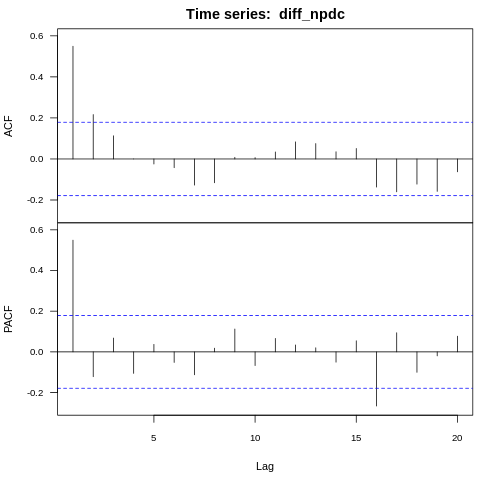

In [0]:
%%R
diff_npdc <- diff(npdc)
plot(diff_npdc, xlab="trimestre", col='red')
acf2y(diff_npdc, lag.max=20)

Series: diff_npdc 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.5582  -1.0000
s.e.  0.0755   0.0273

sigma^2 estimated as 0.06555:  log likelihood=-7.78
AIC=21.57   AICc=21.77   BIC=30.03

Training set error measures:
                      ME      RMSE      MAE MPE MAPE     MASE       ACF1
Training set -0.01250919 0.2529278 0.196005 NaN  Inf 0.579868 0.06054472
            ar1       ma1
t.stat 7.390798 -36.63984
p.val  0.000000   0.00000

	Jarque Bera Test

data:  (res_diff_npdc)
X-squared = 3.1551, df = 2, p-value = 0.2065

      Retard   p-value
 [1,]      1 0.4984627
 [2,]      2 0.3086620
 [3,]      3 0.4711639
 [4,]      4 0.5242064
 [5,]      5 0.6654563
 [6,]      6 0.7527187
 [7,]      7 0.6552535
 [8,]      8 0.5356991
 [9,]      9 0.5183229
[10,]     10 0.6066794
[11,]     11 0.6921162
[12,]     12 0.7180548
[13,]     13 0.7650284
[14,]     14 0.8160295
[15,]     15 0.6072356
[16,]     16 0.4371872
[17,]     17 0.4350664
[18,]     18 0.5010985
[19,]     19 0.372

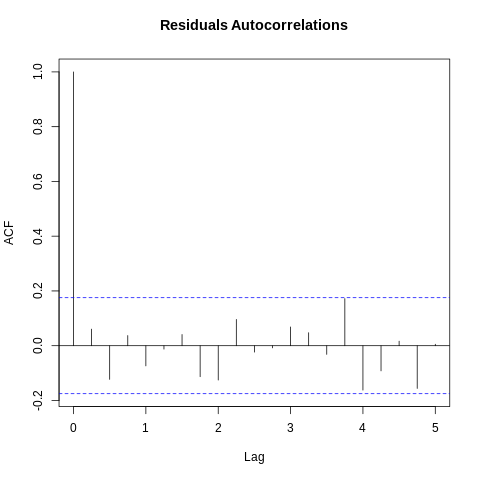

In [0]:
%%R
# Modèle ARIMA(1,1,1)
npdc_arma <- Arima(diff_npdc, order=c(1,1,1), include.mean=FALSE, method="CSS-ML")
summary(npdc_arma)
print(t_stat(npdc_arma))
res_diff_npdc <- residuals(npdc_arma)
#plot(res_diff_npdc, main= 'Residuals')
acf(res_diff_npdc, main= 'Residuals Autocorrelations')
print(jarque.bera.test((res_diff_npdc)))
print(Box.test.2(res_diff_npdc,nlag=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),type="Ljung-Box"))

Series: diff_npdc 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1      ma2
      0.3527  -0.7067  -0.2933
s.e.  0.1688   0.1858   0.1832

sigma^2 estimated as 0.06468:  log likelihood=-6.59
AIC=21.19   AICc=21.53   BIC=32.47

Training set error measures:
                      ME     RMSE       MAE MPE MAPE      MASE        ACF1
Training set -0.01401805 0.250224 0.1972384 NaN  Inf 0.5835171 -0.01372698
            ar1       ma1       ma2
t.stat 2.089442 -3.804428 -1.601034
p.val  0.036668  0.000142  0.109369

	Jarque Bera Test

data:  (res_diff_npdc)
X-squared = 3.9329, df = 2, p-value = 0.14

      Retard   p-value
 [1,]      1 0.8780258
 [2,]      2 0.9848702
 [3,]      3 0.8200766
 [4,]      4 0.8320980
 [5,]      5 0.9153735
 [6,]      6 0.9503281
 [7,]      7 0.9052558
 [8,]      8 0.7815366
 [9,]      9 0.7340617
[10,]     10 0.7915077
[11,]     11 0.8541437
[12,]     12 0.8798452
[13,]     13 0.8945715
[14,]     14 0.8998959
[15,]     15 0.6576432
[16,]     16 0.4327710
[17,]

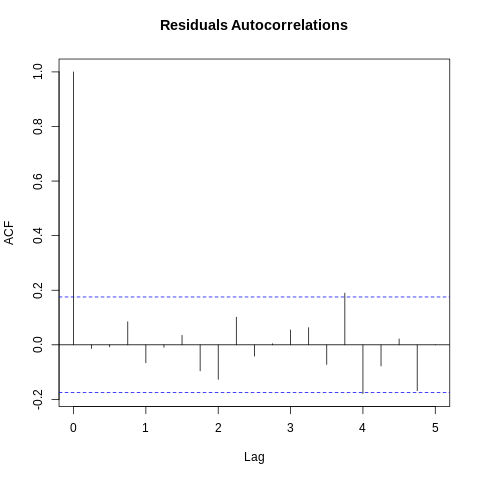

In [0]:
%%R
# Modèle ARIMA(1,1,2)
npdc_arma <- Arima(diff_npdc, order=c(1,1,2), include.mean=FALSE, method="CSS-ML")
summary(npdc_arma)
print(t_stat(npdc_arma))
res_diff_npdc <- residuals(npdc_arma)
#plot(res_diff_npdc, main= 'Residuals')
acf(res_diff_npdc, main= 'Residuals Autocorrelations')
print(jarque.bera.test((res_diff_npdc)))
print(Box.test.2(res_diff_npdc,nlag=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),type="Ljung-Box"))

Series: diff_npdc 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.6209  -0.1155  -1.0000
s.e.  0.0892   0.0889   0.0315

sigma^2 estimated as 0.06507:  log likelihood=-6.95
AIC=21.89   AICc=22.23   BIC=33.18

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set -0.01425531 0.2509825 0.1968984 NaN  Inf 0.5825111 0.004057727
            ar1       ar2       ma1
t.stat 6.964368 -1.299163 -31.70538
p.val  0.000000  0.193888   0.00000

	Jarque Bera Test

data:  (res_diff_npdc)
X-squared = 4.0756, df = 2, p-value = 0.1303

      Retard   p-value
 [1,]      1 0.9638150
 [2,]      2 0.7996192
 [3,]      3 0.6548986
 [4,]      4 0.7125942
 [5,]      5 0.8298591
 [6,]      6 0.8794289
 [7,]      7 0.8090692
 [8,]      8 0.6798225
 [9,]      9 0.6314768
[10,]     10 0.7051820
[11,]     11 0.7809999
[12,]     12 0.8047577
[13,]     13 0.8415799
[14,]     14 0.8628604
[15,]     15 0.6231134
[16,]     16 0.4158097
[

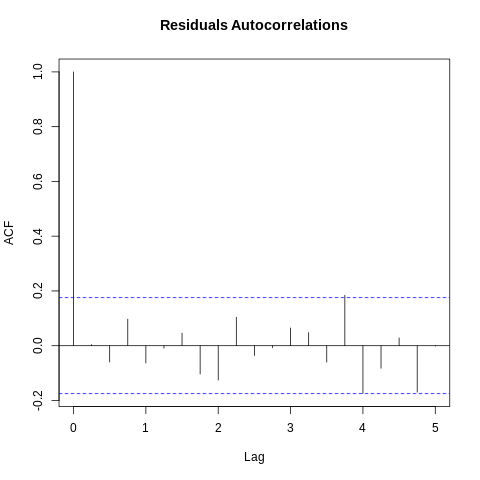

In [0]:
%%R
# Modèle ARIMA(2,1,1)
npdc_arma <- Arima(diff_npdc, order=c(2,1,1), include.mean=FALSE, method="CSS-ML")
summary(npdc_arma)
print(t_stat(npdc_arma))
res_diff_npdc <- residuals(npdc_arma)
#plot(res_diff_npdc, main= 'Residuals')
acf(res_diff_npdc, main= 'Residuals Autocorrelations')
print(jarque.bera.test((res_diff_npdc)))
print(Box.test.2(res_diff_npdc,nlag=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),type="Ljung-Box"))

Series: diff_npdc 
ARIMA(2,1,2) 

Coefficients:
          ar1     ar2     ma1      ma2
      -0.3293  0.4458  0.0000  -1.0000
s.e.   0.0820  0.0822  0.0421   0.0421

sigma^2 estimated as 0.06164:  log likelihood=-4.16
AIC=18.33   AICc=18.84   BIC=32.43

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE       ACF1
Training set -0.01215624 0.2432484 0.1903161 NaN  Inf 0.5630377 0.01764497
             ar1      ar2      ma1       ma2
t.stat -4.014723 5.421869 0.000007 -23.77574
p.val   0.000060 0.000000 0.999995   0.00000

	Jarque Bera Test

data:  (res_diff_npdc)
X-squared = 2.9773, df = 2, p-value = 0.2257

      Retard   p-value
 [1,]      1 0.8436110
 [2,]      2 0.8984509
 [3,]      3 0.9736722
 [4,]      4 0.9911433
 [5,]      5 0.9882791
 [6,]      6 0.9792853
 [7,]      7 0.8487734
 [8,]      8 0.8076538
 [9,]      9 0.8228591
[10,]     10 0.8809539
[11,]     11 0.9228463
[12,]     12 0.9281419
[13,]     13 0.9454323
[14,]     14 0.962515

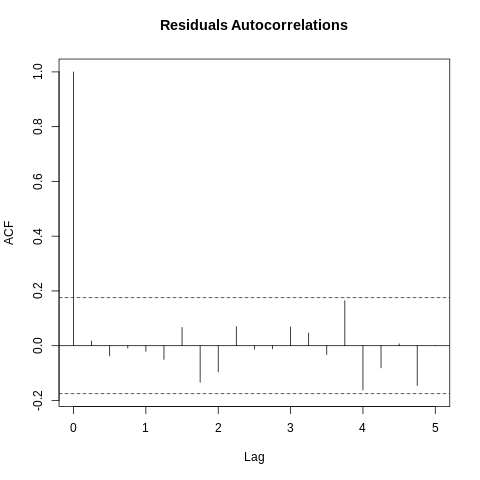

In [0]:
%%R
# Modèle ARIMA(2,1,2)
npdc_arma <- Arima(diff_npdc, order=c(2,1,2), include.mean=FALSE, method="CSS-ML")
summary(npdc_arma)
print(t_stat(npdc_arma))
res_diff_npdc <- residuals(npdc_arma)
#plot(res_diff_npdc, main= 'Residuals')
acf(res_diff_npdc, lag=20, main= 'Residuals Autocorrelations')
print(jarque.bera.test((res_diff_npdc)))
print(Box.test.2(res_diff_npdc,nlag=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),type="Ljung-Box"))

### **Question 3 : Réalisation de la prévision jusqu’à l’année 2015** 

        Point Forecast      Lo 95     Hi 95
2013 Q3     0.01693924 -0.4733253 0.5072038
2013 Q4    -0.01667014 -0.6071521 0.5738118
2014 Q1     0.04652943 -0.5555405 0.6485993
2014 Q2     0.01073659 -0.6022939 0.6237671
2014 Q3     0.05069716 -0.5626612 0.6640555
2014 Q4     0.02158264 -0.5939227 0.6370880
2015 Q1     0.04898399 -0.5664493 0.6644173
2015 Q2     0.02698206 -0.5891639 0.6431280
2015 Q3     0.04644241 -0.5696377 0.6625225
2015 Q4     0.03022605 -0.5861955 0.6466476
$pred
            Qtr1        Qtr2        Qtr3        Qtr4
2013                          0.01693924 -0.01667014
2014  0.04652943  0.01073659  0.05069716  0.02158264
2015  0.04898399  0.02698206  0.04644241  0.03022605

$se
          Qtr1      Qtr2      Qtr3      Qtr4
2013                     0.2501396 0.3012718
2014 0.3071842 0.3127764 0.3129437 0.3140391
2015 0.3140024 0.3143659 0.3143323 0.3145066



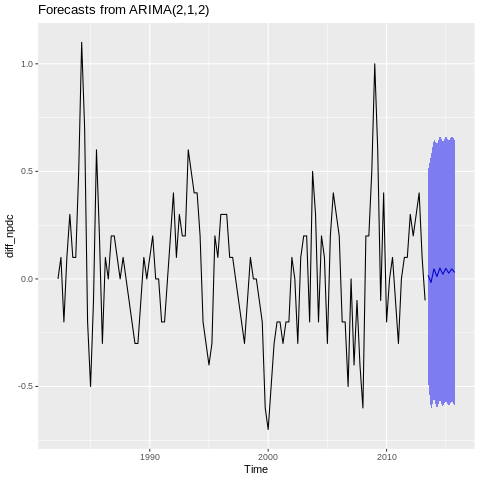

In [0]:
%%R
futurVal <- forecast(npdc_arma, h=10, level=c(95))
print(futurVal)
print(predict(npdc_arma, start=2014, n.ahead=10, se.fit=TRUE))
autoplot(futurVal)

## **Partie B : approche multivariée**

### **Question 1 : graphique des courbes de chômage dans le Nord-Pasde-Calais, en Ile-de-France et dans toute la France.**

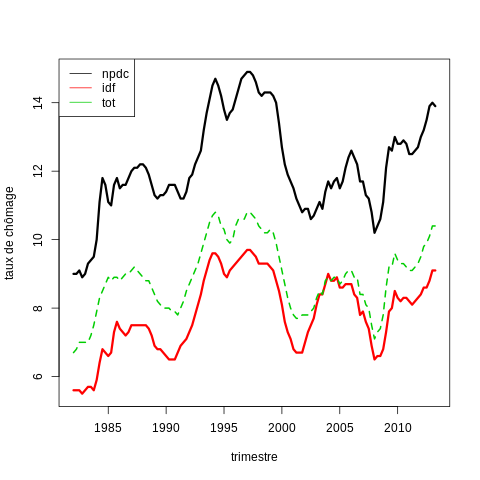

In [0]:
%%R
ts.plot(npdc, idf, tot, xlab="trimestre", ylab="taux de chômage", col=c(1,2,3,3), lty=c(1,1,2,2), lwd=c(3,3,2,2))
legend("topleft", legend = c("npdc", "idf", "tot"), col=c(1,2,3,3), lty = 1)

### **Question 2 : Tester la cointégration de ces séries**

#### **Etape 1 : Tests de racine unitaire sur toutes les séries pour vérifier qu’elles sont I(1) : test de Dikey Fuller**

###### **Test de racine unitaire pour les séries idf et tot**

###### **Modèle 3** 

In [0]:
%%R
test <-function(i){
    ur.df(i, type="trend", lags=12, selectlags = "AIC")
} 
print("Modèle 3 pour la série idf")
print(summary(test(idf)))
print("Modèle 3 pour la série tot")
print(summary(test(tot)))

[1] "Modèle 3 pour la série idf"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47858 -0.10143  0.00452  0.10810  0.50374 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4362544  0.1444776   3.020  0.00316 ** 
z.lag.1     -0.0557521  0.0184626  -3.020  0.00316 ** 
tt           0.0002952  0.0005304   0.557  0.57897    
z.diff.lag1  0.4864542  0.0920878   5.283 6.67e-07 ***
z.diff.lag2  0.1923002  0.0949857   2.025  0.04538 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1781 on 108 degrees of freedom
Multiple R-squared:   0.39,	Adjusted R-squared:  0.3674 
F-statistic: 17.26 on 4 and 108 DF,  p-value: 5.624e-11


Value of test-statistic is: -3.0197 3.1543 4

###### **Modèle 2**

In [0]:
%%R
test <-function(i){
    ur.df(i, type="drift", lags=12, selectlags = "AIC")
} 
print("Modèle 2 pour la série idf")
print(summary(test(idf)))
print("Modèle 2 pour la série tot")
print(summary(test(tot)))

[1] "Modèle 2 pour la série idf"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49085 -0.10157  0.00899  0.10171  0.49041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43614    0.14402   3.028  0.00307 ** 
z.lag.1     -0.05320    0.01783  -2.984  0.00351 ** 
z.diff.lag1  0.48690    0.09179   5.304 5.98e-07 ***
z.diff.lag2  0.18821    0.09440   1.994  0.04868 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1775 on 109 degrees of freedom
Multiple R-squared:  0.3883,	Adjusted R-squared:  0.3715 
F-statistic: 23.06 on 3 and 109 DF,  p-value: 1.233e-11


Value of test-statistic is: -2.9842 4.6058 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3

###### **Modèle 1**

In [0]:
%%R
test <-function(i){
    ur.df(i, type="none", lags=12, selectlags = "AIC")
} 
print("Modèle 1 pour la série idf")
print(summary(test(idf)))
print("Modèle 1 pour la série tot")
print(summary(test(tot)))

[1] "Modèle 1 pour la série idf"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49166 -0.10480  0.00989  0.12269  0.53877 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    0.0005788  0.0021575   0.268    0.789    
z.diff.lag 0.5734829  0.0779225   7.360 3.42e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1847 on 111 degrees of freedom
Multiple R-squared:  0.3325,	Adjusted R-squared:  0.3204 
F-statistic: 27.64 on 2 and 111 DF,  p-value: 1.814e-10


Value of test-statistic is: 0.2683 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62

[1] "Modèle 1 pour la série tot"

############################################### 
# Augmented Dic

###### **Test de racine unitaire pour les séries idf et tot différenciées**

In [0]:
%%R
diff_npdc <- diff(npdc)
diff_idf <- diff(idf)
diff_tot <- diff(tot)

     Qtr1 Qtr2 Qtr3 Qtr4
1982       0.1  0.2  0.0
1983  0.0  0.0  0.2  0.3
1984  0.4  0.4  0.2  0.2
1985  0.2 -0.1  0.1  0.0
1986 -0.1  0.1  0.1  0.0
1987  0.1  0.1 -0.1 -0.1
1988 -0.1 -0.1  0.0 -0.2
1989 -0.2 -0.2 -0.1 -0.1
1990  0.0  0.0 -0.1  0.0
1991 -0.1  0.2  0.2  0.3
1992  0.2  0.2  0.2  0.2
1993  0.3  0.3  0.3  0.3
1994  0.2  0.1 -0.1 -0.3
1995 -0.1 -0.3 -0.1  0.1
1996  0.4  0.2  0.0  0.0
1997  0.2  0.0 -0.1 -0.1
1998 -0.2 -0.1 -0.1  0.0
1999  0.1 -0.1 -0.3 -0.4
2000 -0.4 -0.4 -0.4 -0.3
2001 -0.2 -0.1  0.0  0.1
2002  0.0  0.0  0.1  0.1
2003  0.3  0.2 -0.1  0.4
2004  0.1 -0.1  0.1  0.0
2005 -0.2  0.1  0.2  0.1
2006  0.0 -0.2  0.0 -0.5
2007  0.0 -0.3 -0.1 -0.5
2008 -0.4  0.2  0.1  0.4
2009  0.8  0.6  0.0  0.4
2010 -0.2 -0.1  0.0 -0.1
2011 -0.1  0.0  0.1  0.1
2012  0.2  0.3  0.1  0.2
2013  0.3  0.0          


###### **Modèle 3**

In [0]:
%%R
test <-function(i){
    ur.df(i, type="trend", lags=12, selectlags = "AIC")
} 
print("Modèle 3 pour la série diff_npdc")
print(summary(test(diff_npdc)))
print("Modèle 3 pour la série diff_idf")
print(summary(test(diff_idf)))
print("Modèle 3 pour la série diff_tot")
print(summary(test(diff_tot)))

[1] "Modèle 3 pour la série diff_npdc"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50223 -0.15005 -0.01601  0.13232  0.71517 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.497e-02  5.399e-02   0.277    0.782    
z.lag.1     -4.610e-01  9.100e-02  -5.066 1.69e-06 ***
tt          -4.563e-05  7.130e-04  -0.064    0.949    
z.diff.lag   1.749e-02  9.492e-02   0.184    0.854    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2437 on 108 degrees of freedom
Multiple R-squared:  0.2269,	Adjusted R-squared:  0.2055 
F-statistic: 10.57 on 3 and 108 DF,  p-value: 3.769e-06


Value of test-statistic is: -5.0661 8.5735 12.8591 

Critical values for test statistics: 
 

###### **Modèle 2**

In [0]:
%%R
test <-function(i){
    ur.df(i, type="drift", lags=12, selectlags = "AIC")
} 
print("Modèle 2 pour la série diff_npdc")
print(summary(test(diff_npdc)))
print("Modèle 2 pour la série diff_idf")
print(summary(test(diff_idf)))
print("Modèle 2 pour la série diff_tot")
print(summary(test(diff_tot)))

[1] "Modèle 2 pour la série diff_npdc"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50231 -0.14776 -0.01484  0.13400  0.71344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01185    0.02303   0.514    0.608    
z.lag.1     -0.46119    0.09053  -5.094 1.48e-06 ***
z.diff.lag   0.01772    0.09442   0.188    0.852    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2426 on 109 degrees of freedom
Multiple R-squared:  0.2269,	Adjusted R-squared:  0.2127 
F-statistic:    16 on 2 and 109 DF,  p-value: 8.104e-07


Value of test-statistic is: -5.0942 12.9768 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81

[1] "M

###### **Modèle 1**

In [0]:
%%R
test <-function(i){
    ur.df(i, type="none", lags=12, selectlags = "AIC")
} 
print("Modèle 1 pour la série diff_npdc")
print(summary(test(diff_npdc)))
print("Modèle 1 pour la série diff_idf")
print(summary(test(diff_idf)))
print("Modèle 1 pour la série diff_tot")
print(summary(test(diff_tot)))

[1] "Modèle 1 pour la série diff_npdc"

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48974 -0.13592 -0.00348  0.14579  0.72352 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.45693    0.08985  -5.085 1.52e-06 ***
z.diff.lag  0.01649    0.09407   0.175    0.861    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2418 on 110 degrees of freedom
Multiple R-squared:  0.225,	Adjusted R-squared:  0.2109 
F-statistic: 15.97 on 2 and 110 DF,  p-value: 8.143e-07


Value of test-statistic is: -5.0854 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62

[1] "Modèle 1 pour la série diff_idf"

############################################### 
# Augme

#### **Etape 2 : Estimer par les MCO la relation de long terme**

In [0]:
%%R
reg <- lm(npdc ~ tot + idf)
print(summary(reg))
dwtest(reg)


Call:
lm(formula = npdc ~ tot + idf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85139 -0.27197  0.02641  0.23173  0.86458 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28452    0.30716   0.926   0.3561    
tot          1.20117    0.08012  14.992   <2e-16 ***
idf          0.14794    0.07360   2.010   0.0466 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3851 on 123 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9294 
F-statistic: 823.8 on 2 and 123 DF,  p-value: < 2.2e-16


	Durbin-Watson test

data:  reg
DW = 0.22146, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



#### **Etape 3 : Effectuer un test de racine unitaire sur les résidus estimés ε(t) et vérifier que I(0)**

In [0]:
%%R
resid_reg <- reg$residuals
test <- ur.df(resid_reg, type = "drift")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60561 -0.09036  0.01991  0.10912  0.45727 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0008252  0.0150329   0.055 0.956312    
z.lag.1     -0.1478328  0.0404091  -3.658 0.000377 ***
z.diff.lag   0.3273763  0.0857925   3.816 0.000215 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1674 on 121 degrees of freedom
Multiple R-squared:  0.1576,	Adjusted R-squared:  0.1437 
F-statistic: 11.32 on 2 and 121 DF,  p-value: 3.119e-05


Value of test-statistic is: -3.6584 6.6923 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



#### **Test de racine unitaire sur les résidus différenciés à l’ordre 1 de la relation statique**

In [0]:
%%R
diff_resid_reg <- diff(resid_reg)
test <- ur.df(diff_resid_reg, type = "drift")
summary(test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43394 -0.10826  0.03372  0.10770  0.45432 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.002271   0.014657   0.155    0.877    
z.lag.1     -1.049095   0.103147 -10.171  < 2e-16 ***
z.diff.lag   0.397584   0.084601   4.700 7.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1625 on 120 degrees of freedom
Multiple R-squared:  0.4725,	Adjusted R-squared:  0.4637 
F-statistic: 53.75 on 2 and 120 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.1709 51.7237 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



### **Question 3 : Estimation du modèle VAR multivarié**

In [0]:
%%R
model_var <- cbind(diff_npdc, diff_idf, diff_tot)

##### **Recherche du nombre de retards appropriés**

In [0]:
%%R
infocrit1 <- VARselect(model_var, lag.max =8, type = "const")
infocrit1

$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2 

$criteria
                   1             2             3             4             5
AIC(n) -1.137696e+01 -1.175840e+01 -1.172278e+01 -1.169139e+01 -1.167051e+01
HQ(n)  -1.126194e+01 -1.155712e+01 -1.143524e+01 -1.131758e+01 -1.121044e+01
SC(n)  -1.109366e+01 -1.126262e+01 -1.101453e+01 -1.077066e+01 -1.053731e+01
FPE(n)  1.145736e-05  7.826722e-06  8.117220e-06  8.388731e-06  8.586366e-06
                   6             7             8
AIC(n) -1.162046e+01 -1.152038e+01 -1.146294e+01
HQ(n)  -1.107413e+01 -1.088779e+01 -1.074409e+01
SC(n)  -1.027479e+01 -9.962234e+00 -9.692320e+00
FPE(n)  9.058949e-06  1.006147e-05  1.072557e-05



#### **Estimation du modéle retenu**

In [0]:
%%R
var_multi <- VAR(model_var, p=2, type = "const", season = NULL, exogen = NULL)
summary(var_multi)


VAR Estimation Results:
Endogenous variables: diff_npdc, diff_idf, diff_tot 
Deterministic variables: const 
Sample size: 123 
Log Likelihood: 222.172 
Roots of the characteristic polynomial:
0.7785 0.7671 0.7671 0.3386 0.3378 0.2441
Call:
VAR(y = model_var, p = 2, type = "const", exogen = NULL)


Estimation results for equation diff_npdc: 
diff_npdc = diff_npdc.l1 + diff_idf.l1 + diff_tot.l1 + diff_npdc.l2 + diff_idf.l2 + diff_tot.l2 + const 

             Estimate Std. Error t value Pr(>|t|)    
diff_npdc.l1  0.58548    0.14950   3.916 0.000152 ***
diff_idf.l1  -0.40233    0.20846  -1.930 0.056046 .  
diff_tot.l1   0.36640    0.18776   1.951 0.053421 .  
diff_npdc.l2 -0.57091    0.14816  -3.853 0.000191 ***
diff_idf.l2   0.20345    0.21207   0.959 0.339357    
diff_tot.l2   0.61477    0.19245   3.195 0.001804 ** 
const         0.01641    0.02154   0.762 0.447818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.2361 on 116 degrees of

##### **Vérificaiton de la stationnarité**

In [0]:
%%R
roots <- roots(var_multi)
roots

[1] 0.7784609 0.7670834 0.7670834 0.3386325 0.3378343 0.2441458


### **Question 4 : Réalisation de la prévision jusqu’à l’année 2016**

$diff_npdc
            fcst      lower     upper        CI
 [1,] 0.14623503 -0.3164676 0.6089376 0.4627026
 [2,] 0.12764915 -0.4123496 0.6676479 0.5399987
 [3,] 0.07196702 -0.5083499 0.6522840 0.5803169
 [4,] 0.04545289 -0.5478678 0.6387736 0.5933207
 [5,] 0.07317850 -0.5277101 0.6740671 0.6008886
 [6,] 0.08487936 -0.5215891 0.6913479 0.6064685
 [7,] 0.06448192 -0.5451323 0.6740962 0.6096143
 [8,] 0.04464482 -0.5675693 0.6568590 0.6122142
 [9,] 0.04563430 -0.5674008 0.6586694 0.6130351
[10,] 0.05305429 -0.5607183 0.6668269 0.6137726
[11,] 0.05100660 -0.5631298 0.6651430 0.6141364
[12,] 0.04332502 -0.5711342 0.6577842 0.6144592
[13,] 0.04027660 -0.5743364 0.6548896 0.6146130
[14,] 0.04228897 -0.5723994 0.6569774 0.6146884

$diff_idf
            fcst      lower     upper        CI
 [1,] 0.16474721 -0.1668195 0.4963139 0.3315667
 [2,] 0.12390368 -0.2467929 0.4946003 0.3706966
 [3,] 0.07728379 -0.3338541 0.4884217 0.4111379
 [4,] 0.04580295 -0.3819063 0.4735122 0.4277093
 [5,] 0.06023336 -

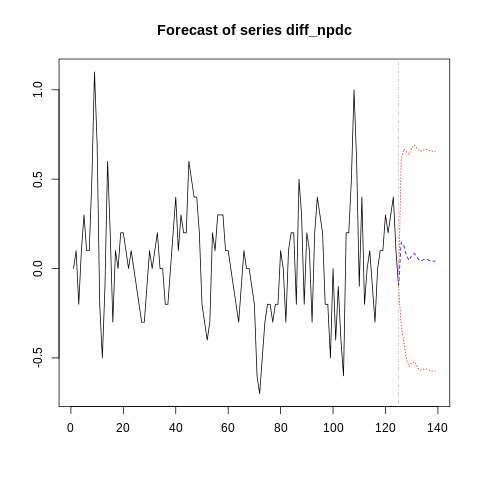

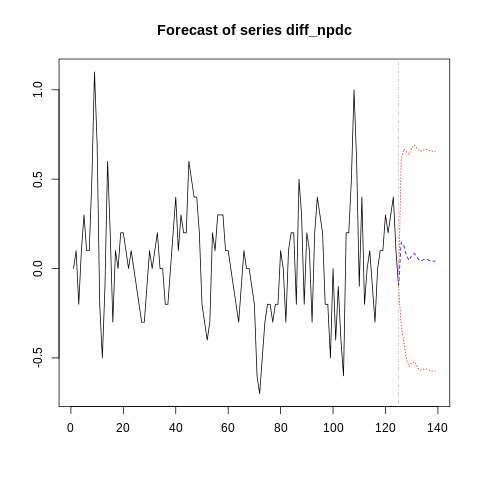

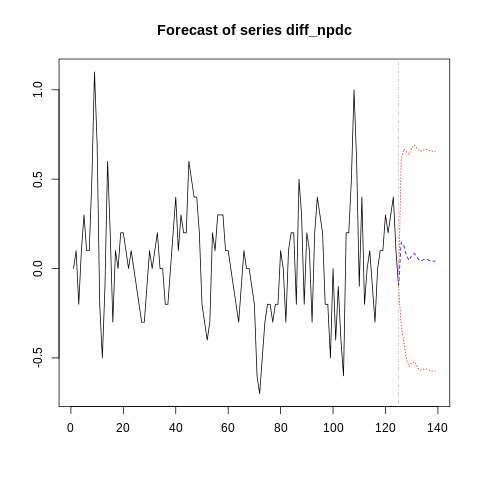

In [0]:
%%R 
args(vars:::predict.varest)
pred <- predict(var_multi, n.ahead = 14, ci = 0.95)
print(pred)
class(pred)
# Graphique de la prédiction de npdc
args(vars:::plot.varprd)
plot(pred, names="npdc")
# Graphique de la prédiction de idf
args(vars:::plot.varprd)
plot(pred, names="idf")
# Graphique de la prédiction de tot
args(vars:::plot.varprd)
plot(pred, names="tot")